In [361]:
from matplotlib import pyplot as plt
import numpy as np
from ipywidgets import interact
from copy import copy

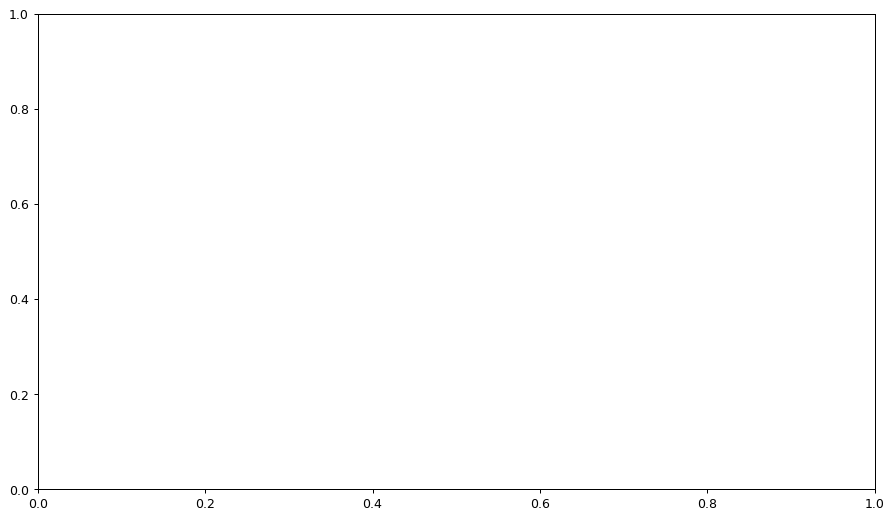

In [466]:

status = {}

fig  = plt.figure(figsize=(12, 7), dpi=90)
ax = plt.subplot(111)

def neurofeedback(bands):
    
    ax.clear()
    
    max_ = 10


    for k in bands:
        
        status.setdefault(k, 0)
        
        if bands[k][0] and bands[k][1]=='increase':
            status[k] += 1
        elif not bands[k][0] and bands[k][1]=='increase':
            status[k] -= 1
        elif bands[k][0] and bands[k][1]=='decrease':
            status[k] += 1
        elif not bands[k][0] and bands[k][1]=='decrease':
            status[k] -= 1
    
    
    data = status
    
    bottom = []
    for i in data:
        if data[i]>0:
            bottom.append(1)
        else:
            bottom.append(-1)
    
    bottom = np.array(bottom, dtype=float)
    bottom *= 0.5
    
    for i, (b, name) in enumerate(zip(bottom, bands)):
        
        
        
        # v = status[name]

        
        control = copy(bands[name][1])
        value = bands[name][0]
        
        
        if control=='decrease':
            control = 'increase'
            status[name] = -status[name]

        b=np.sign(status[name])
        b_ = 1
        m = max_
        
        
        if status[name]>max_:
            status[name] = max_
        elif status[name]<-max_:
            status[name] = -max_
        
        ax.arrow(i, b_, 0, m, capstyle='projecting', width=0.45, head_width=0.8, head_length=3, fc='w', ls=(0, (10,10)), ec='C0', alpha=0.5, length_includes_head=False)
        if status[name] > 0 and control=='increase' or status[name] < 0 and control=='decrease':
            color='C0'
        else:
            color='C3'
        ax.arrow(i, b, 0, status[name], capstyle='projecting', width=0.45, head_width=0.8, head_length=3, ec='white', fc=color, length_includes_head=False)
        ax.text(i, 0, name, ha='center', va='center', fontsize=15)
        

        if bands[name][1]=='decrease':
            # control = 'increase'
            status[name] = -status[name]
    
    ax.set_ylim(-15, 15)
    ax.axis('off')
    
    fig.savefig('test.png', format='png')
    fig.savefig(f, format='svg')
    
    return base64.b64encode(f.getvalue()).decode()
    

In [467]:
neurofeedback(
{

    'Alpha':  [False, 'increase'],
    'Beta':  [False, 'decrease'],
    'Gamma':  [True, 'decrease'],

});

'PD94bWwgdmVyc2lvbj0iMS4wIiBlbmNvZGluZz0idXRmLTgiIHN0YW5kYWxvbmU9Im5vIj8+CjwhRE9DVFlQRSBzdmcgUFVCTElDICItLy9XM0MvL0RURCBTVkcgMS4xLy9FTiIKICAiaHR0cDovL3d3dy53My5vcmcvR3JhcGhpY3MvU1ZHLzEuMS9EVEQvc3ZnMTEuZHRkIj4KPHN2ZyB4bWxuczp4bGluaz0iaHR0cDovL3d3dy53My5vcmcvMTk5OS94bGluayIgd2lkdGg9IjExNTJwdCIgaGVpZ2h0PSI2NDhwdCIgdmlld0JveD0iMCAwIDExNTIgNjQ4IiB4bWxucz0iaHR0cDovL3d3dy53My5vcmcvMjAwMC9zdmciIHZlcnNpb249IjEuMSI+CiA8bWV0YWRhdGE+CiAgPHJkZjpSREYgeG1sbnM6ZGM9Imh0dHA6Ly9wdXJsLm9yZy9kYy9lbGVtZW50cy8xLjEvIiB4bWxuczpjYz0iaHR0cDovL2NyZWF0aXZlY29tbW9ucy5vcmcvbnMjIiB4bWxuczpyZGY9Imh0dHA6Ly93d3cudzMub3JnLzE5OTkvMDIvMjItcmRmLXN5bnRheC1ucyMiPgogICA8Y2M6V29yaz4KICAgIDxkYzp0eXBlIHJkZjpyZXNvdXJjZT0iaHR0cDovL3B1cmwub3JnL2RjL2RjbWl0eXBlL1N0aWxsSW1hZ2UiLz4KICAgIDxkYzpkYXRlPjIwMjItMDUtMDRUMTg6MjY6MDUuNTE5Mzc1PC9kYzpkYXRlPgogICAgPGRjOmZvcm1hdD5pbWFnZS9zdmcreG1sPC9kYzpmb3JtYXQ+CiAgICA8ZGM6Y3JlYXRvcj4KICAgICA8Y2M6QWdlbnQ+CiAgICAgIDxkYzp0aXRsZT5NYXRwbG90bGliIHYzLjUuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy88L2RjOnRpdGxlPgo

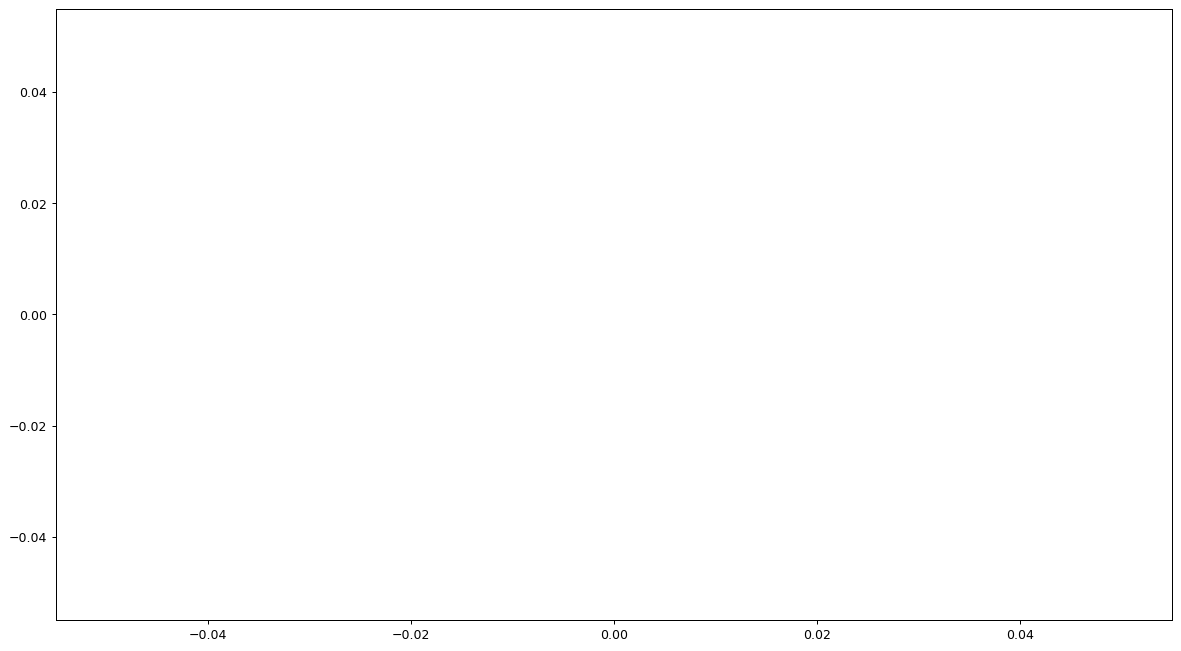

In [346]:
from radiant import PythonHandler
from matplotlib import pyplot as plt
from io import BytesIO
import base64

f = BytesIO()
plt.figure(figsize=(16,9), dpi=90)
plt.plot()
plt.savefig(f, format='svg')


base64.b64encode(f.getvalue()).decode()

In [347]:
f